<img src="../pyDataCover.jpg"/>

<h3>Descriptive and Inferential Statistics</h3>
<p>Descriptive Statistics is used to summarize data. Inferential Statistics tries to uncover
attributes about a large population, often based on a sample.</p>
<p>
    What is data?
</p>

<p>Data and Photographs example</p>

<h3>Population, Samples, Bias</h3>
<p>A <strong>population</strong> is a particular group of interest we want to study.</p>
<p>A <strong>sample</strong> is a subset of the population that is ideally random and unbiased,
which we use to infer attributes about the population.</p>
<p>Bias, used to describe inaccurate representation to the population.</p>
<p>
    A <strong>selection bias</strong>; particular type of bias where
    a specific group is more likely to include themselves in a sample
</p>

<p>
    A <strong>confirmation bias</strong>, gathering data that supports your belief, which can even be done
    unknowingly. An example is following only social media accounts you politically agree
    with, reinforcing your beliefs rather than challenging them.
</p>

<h4>Mean and Weighted Mean</h4>

In [50]:
# Weighted Mean, GPA
samples = [90, 80, 63, 87]
weights = [.20, .20, .20, .40]
weighted_mean = sum(s*w for s,w in zip(samples, weights)) / sum(weights)

In [51]:
weighted_mean

81.4

In [52]:
# Weights don't have to be percentages as the numbers will endup being proportionalized.
weights = [1.0, 1.0, 1.0, 2.0]
weighted_sum = sum(s*w for s,w in zip(samples, weights))/sum(weights)
weighted_sum

81.4

In [53]:
# Median
# The middlemost value in a set of ordered values
def median(values):
    ordered = sorted(values)
    print(ordered)
    n = len(ordered)
    mid = int(n/2)-1 if n%2 == 0 else int(n/2)

    if n%2 == 0:
        return (ordered[mid] + ordered[mid+1])/2.0
    else:
        return ordered[mid]

In [54]:
# Median is the preferrable in outlier-heavy situations(such as income related data) over the mean.
# Example: Salary of Ugandans without a university degree, there shall be many outliers
median(samples)

[63, 80, 87, 90]


83.5

In [55]:
# Quartiles
# Mode is the most frequently occuring set of values. When two values occur with the same frequency, it is considered
# bimodal.
# Number of shoes your friends own
from collections import defaultdict
sample = [1, 3, 2, 5, 7, 4, 2, 3]
def mode(values):
    counts = defaultdict(lambda:0)
    for s in values:
        counts[s] += 1
    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes

In [56]:
mode(sample)

[2, 3]

In [57]:
# Variance and Standard Deviation
# Population variance is the measure of how data is spreadout
# Example number of shoes owned by my friends
dataShoes = [2, 3, 6, 3, 7, 2, 8]
def variance(values):
    mean = sum(values)/len(values)
    _variance=sum((v-mean)**2 for v in values)/len(values)
    return _variance
print(variance(dataShoes))

5.387755102040816


In [58]:
# Standard deviation
from math import sqrt
def std_dev(values):
    return sqrt(variance(values))

# Example
# Standard devation of dataShoes
std_dev(dataShoes)

2.3211538298959886

In [59]:
# Sample Variance and Stadard Deviation
# Qn. Why subtract 1 from sample size

def variance(values, is_sample: bool=False):
    mean = sum(values) / len(values)
    _variance = sum((v-mean)**2 for v in values) / (len(values)-(1 if is_sample else 0))
    return _variance

def std_dev(values, is_sample:bool=False):
    return sqrt(variance(values, is_sample))

In [60]:
# Example
# Number of shoes each person owns
variance(dataShoes, is_sample=True)

6.285714285714286

In [61]:
# Contrast obtained value with variance of population
std_dev(dataShoes, is_sample=True)

# 2.5071326821120348 for sample
# 2.3211538298959886 for population

2.5071326821120348

<h3>Normal Distribution (Gaussian Distribution) and Probability Density Function</h3>
<p>
    Normal Distribution is a probability distribution that appears as a "bell curve" when graphed.
    The normal distribution describes a symmetrical plot of data around its mean value, where width of
    the curve is defined by the standard deviation.
</p>

<h5>Properties of the Normal Distribution</h5>
<ul>
    <li>Symmetrical; both sides are identically mirrored at the mean, which is the center.</li>
    <li>Most mass is at the center around the mean.</li>
    <li>It has a spread (being narrow or wide> that is specified by the standard deviation.</li>
    <li>The tails are the least likely outcomes and approach zero infinitely but never touch zero.</li>
</ul>

<h4>The Cummulative Desnsity Function, CDF</h4>
<p>
    The probability to get a value between x1 and x2, where x1 > x2, is the area under the curve from x1 to x2.
</p>

In [62]:
# the Probability Density Function in Python
def pdf(x: float,
        mean: float,
        std_dev: float):
    return (1.0/(std_dev*(2.0*math.pi)**0.5)*math.exp((-1.0*((x-mean)/std_dev)**2)/2))

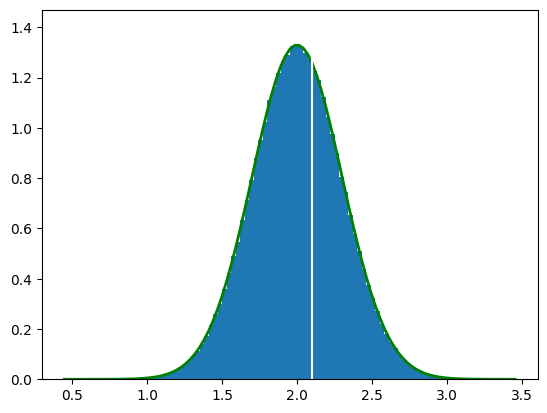

In [70]:
# Example
import matplotlib.pyplot as plt
import numpy as np
mu, std_dev = 2, 0.3 # mean and standard deviation
s = np.random.normal(mu, std_dev, 1_000_000)
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(std_dev*np.sqrt(2*np.pi))*np.exp(-1*(bins-mu)**2/(2*std_dev**2)),
         linewidth=2,
         color='g')
plt.vlines(2.1, 0, 1.4, "white", );
plt.vlines(2.1, 0, 1.4, "white", );
plt.show();